In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, e , m_e, epsilon_0, pi
from LPICS.ics import CheatSheet as cs

from openpmd_viewer.addons.pic import LpaDiagnostics
from openpmd_viewer import OpenPMDTimeSeries, ParticleTracker

### Plotting the phase space with all electrons & corresponding density

<IPython.core.display.Javascript object>


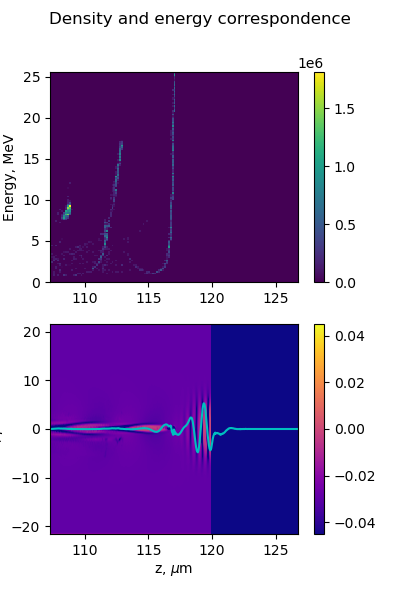

In [63]:
ts = LpaDiagnostics('../runs/test_06/05/diags_shock_per5/hdf5/')

i=20                  #iteration number
vmax = 0.045          #smth to normalize colorscale for rho(z,r)
rho, info = ts.get_field( 'rho', iteration=ts.iterations[i])
z, uz, w = ts.get_particle( ['z', 'uz', 'w'], species='electrons', iteration=ts.iterations[i], vmax=vmax )
Ex, info_Ex = ts.get_field(field='E', coord='x', iteration=ts.iterations[i] )
l_e = len(Ex)//2      #To consider E_x field along the slice with r=0
zz = np.linspace(info_Ex.imshow_extent[0]*1e6, info_Ex.imshow_extent[1]*1e6, len(Ex[l_e]) )

fig, axs = plt.subplots(2)
fig.set_size_inches(4, 6)
fig.suptitle('Density and energy correspondence')
pos0 = axs[0].hist2d(z*1e6, uz*m_e*c**2/e*1e-6, weights = w, bins= 128,\
                     range = [info.imshow_extent[0:2]*1e6,[0,m_e*c**2/e*50*1e-6]]);
axs[0].set_ylabel(r'Energy, MeV')
fig.colorbar(pos0[3], ax=axs[0])


pos1 = axs[1].imshow(rho/e * 1e-6 / 1.73e21, aspect='auto', origin='lower',
           extent=info.imshow_extent*1e6, cmap=plt.cm.plasma, 
           vmax=vmax, vmin=-vmax)
axs[1].plot(zz, Ex[l_e]*2e-12, 'c')
axs[1].set_ylabel(r'r, $\mu$m')
axs[1].set_xlabel(r'z, $\mu$m')
fig.colorbar(pos1, ax=axs[1])

### Plotting the laser intensity (vacuum VS plasma)

<IPython.core.display.Javascript object>


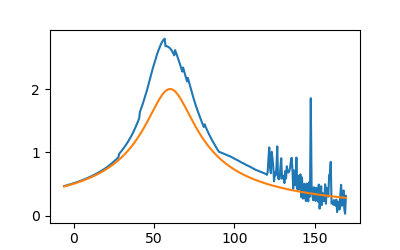

/home/andriyash/miniconda3/lib/python3.7/site-packages/openpmd_viewer/addons/pic/lpa_diagnostics.py:726: RuntimeWarning: divide by zero encountered in double_scalars
  a0 = Emax * const.e / (const.m_e * const.c * omega)


In [120]:
ts = LpaDiagnostics('../runs/test_06/03/diags/hdf5/')

# The laser
a0 = 2.             # Laser amplitude
w0 = 2.e-6          # Laser waist
ctau = c * 5.e-15   # Laser duration
z0 = -4*ctau        # Laser centroid
zf = 60.e-6         # Laser focus
lambda0 = 800e-9    # Laser wavelength


plt.figure(figsize=(4,2.5))
L_R = w0**2*np.pi / lambda0
zz = z0 + ts.t*c
plt.plot(zz*1e6 , [ts.get_a0(pol='x', t=t) for t in ts.t])
plt.plot(zz*1e6, a0/( 1 + (zz-zf)**2/ L_R**2)**0.5)

### Plotting specrum through time (or z)

<IPython.core.display.Javascript object>


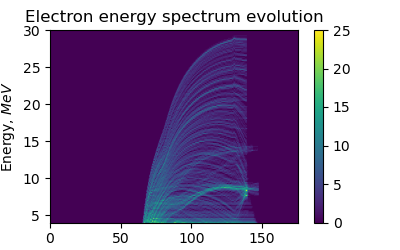

In [89]:
ts = LpaDiagnostics('../runs/test_06/03/diags/hdf5/')

N_bins = 150
erange = [4,30]
ar_2d = []
for t in ts.t:
    uz, w, = ts.get_particle(var_list=['uz', 'w',], t=t)
    energy = uz*m_e*c**2/e*1e-6
    H, bins = np.histogram(energy, bins=N_bins, density=False, range=erange)
    ar_2d.append(H)

ar_2d = np.array(ar_2d)
ar_2d = np.transpose(ar_2d)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(4, 2.5)
ext = [0, ts.t[-1]*c*1e6, *erange]
plt.imshow(ar_2d, origin='lower', aspect='auto', extent=ext)
plt.colorbar()

### Plot the density profile at the same axis
# z=np.linspace(-20e-6,100e-6,500)
# plt.plot((ts.t*c-z0)*1e6, 10*dens_func(ts.t*c-z0,0), 'r')

plt.title('Electron energy spectrum evolution')
plt.ylabel(r'Energy, $MeV$')
plt.xlabel(r'$c \cdot t, \mu m$')

plt.show()

### Get charge from the specified region 

In [91]:
ts = LpaDiagnostics('../runs/test_06/04/diags/hdf5/')
uz, w, z = ts.get_particle(var_list=['uz', 'w', 'z'], t=ts.t[-1])

w.sum()*e*1e12, ts.get_charge(t=ts.t[-1], select={'uz':[7/0.511, 10/0.511]} )*1e12

(21.196826894359287, -3.36793997858328)

### Plot the phase-space diagram

<IPython.core.display.Javascript object>


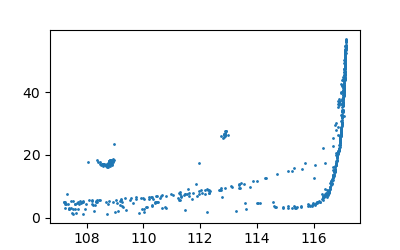

In [109]:
ts = LpaDiagnostics('../runs/test_06/04/diags/hdf5/')

plt.figure(figsize=(4,2.5))
plt.plot(z*1e6,uz,'.', ms = 2)

### Plot phase-space diagram with weights

<IPython.core.display.Javascript object>


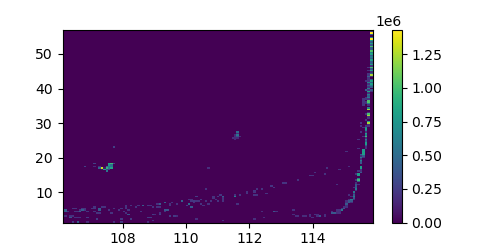

In [118]:
plt.figure(figsize=(5,2.5))
# plt.hist(0.511*((1+uz**2)**0.5-1), weights=w, bins=128);
plt.hist2d(z*1e6, uz, weights=w, bins=128, );
plt.colorbar()

### See recorded components

In [72]:
ts = LpaDiagnostics('../runs/test_06/04/diags/hdf5/')
ts.avail_record_components

{'electrons': ['charge', 'id', 'mass', 'x', 'y', 'z', 'ux', 'uy', 'uz', 'w']}

### Get and plot particle trajectories (on z-axis)

In [43]:
ts = LpaDiagnostics('../sims/02_shock_ins/test_03/_gauss_shock/shock_05/diags_p/hdf5/')

pt = ParticleTracker( ts, iteration=ts.iterations[0], select={'uz':[5,None]}, 
                         species='electrons', preserve_particle_index=True )
z_trajectories, x_trajectories, uz_trajectories, ux_trajectories =\
                        ts.iterate( ts.get_particle, ['z', 'x', 'uz', 'ux'], select=pt, species='electrons' )

100%|██████████| 3647/3647 [00:39<00:00, 91.64it/s] 


<IPython.core.display.Javascript object>


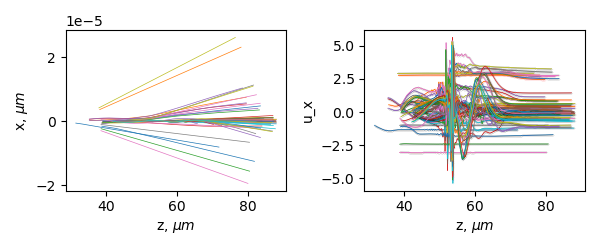

In [55]:
plt.figure(figsize=(6, 2.5))
plt.subplot(121)
for i in range(0, len(x_trajectories[1]), 50):
    plt.plot( z_trajectories[:,i]*1e6, x_trajectories[:,i], '-', markersize=1, linewidth=0.5)
plt.ylabel(r'x, $\mu m$')
plt.xlabel(r'z, $\mu m$')

plt.subplot(122)
for i in range(0, len(ux_trajectories[1]), 50):
    plt.plot( z_trajectories[:,i]*1e6, ux_trajectories[:,i], '.-', markersize=0.005, linewidth=0.5)
plt.ylabel('u_x')
plt.xlabel(r'z, $\mu m$')
plt.tight_layout()

### Plot particle x_gamma factors (on iteration number axis)

<IPython.core.display.Javascript object>


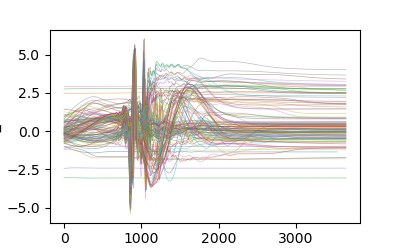

Text(0.5, 0, 'iteration number')

In [58]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(4, 2.5)

for i in range(0, len(ux_trajectories[1]), 25):
    ax.plot( ux_trajectories[:,i], '-', alpha=0.5, linewidth=0.5, markersize=1)
    
ax.set_ylabel('u_x')
ax.set_xlabel(r'iteration number')

### Plot particle x_accelerations (on iteration number axis)

<IPython.core.display.Javascript object>


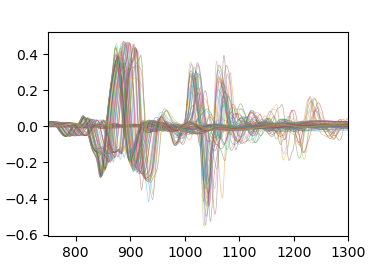

In [57]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(4, 2.5)

for i in range(0, len(ux_trajectories[1]), 25):
    acc =[]
    for j in range(1,len(ux_trajectories[:,i]-1)):
        acc.append(ux_trajectories[j,i]-ux_trajectories[j-1,i])
    ax.plot(acc, '-', alpha=0.5, linewidth=0.5)
    
ax.set_ylabel('acceleration_x')
ax.set_xlabel(r'iteration #')
ax.set_xlim(750,1300)

plt.show()

#smth went wrong when saving, so it's so sharp..

### Plot histogram of particle energies

<IPython.core.display.Javascript object>


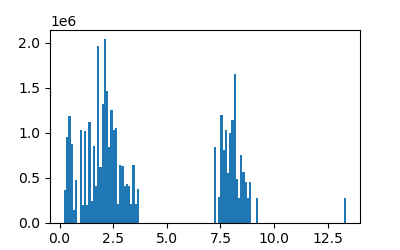

In [99]:
ts = LpaDiagnostics('../runs/test_06/04/diags_shock/hdf5/')

uz, w = ts.get_particle(var_list=['uz', 'w'], iteration=ts.iterations[-1])
plt.figure(figsize=(4,2.5))
plt.hist(0.511*((1+uz**2)**0.5-1), weights=w, bins=128);

### Comparison of A_0

In [4]:
ts = LpaDiagnostics('../sims/02_shock_ins/test_04/shock/diags/hdf5/')
a0 = 0.1   #idially it should be taken from script

print('A_0 in the very beginning:\t', a0)
print('A_0 before the shock:\t\t', round(ts.get_a0(pol = 'x', iteration=ts.iterations[0]),4) )
print('A_0 in the end:\t\t\t', round(ts.get_a0(pol = 'x', iteration=ts.iterations[-1]),4) )

A_0 in the very beginning:	 0.1
A_0 before the shock:		 0.0875
A_0 in the end:			 0.0015


### Superposition of laser E field and \rho field
###### (doing transparent E-field)

<IPython.core.display.Javascript object>


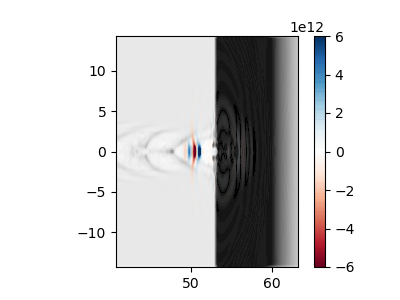

In [17]:
from copy import deepcopy
ts = LpaDiagnostics('../sims/02_shock_ins/test_03/_gauss_shock/shock_03/diags/hdf5/')

myRdBu = deepcopy(plt.cm.RdBu)
myRdBu._init()
myRdBu._lut[:, -1] = np.abs(np.r_[-1: 1: 259j])**0.5

it=ts.iterations[30]
plt.figure(figsize=(4,3))
rho, info = ts.get_field('rho', iteration=it, theta=np.pi/2)
plt.imshow(rho, extent=info.imshow_extent*1e6, cmap=plt.cm.gray, vmax= 0, vmin= -10e7)

E_x, info = ts.get_field('E', 'x', iteration=it, theta=np.pi/2)
plt.imshow(E_x, extent=info.imshow_extent*1e6, cmap=myRdBu, vmax= 6e12, vmin= -6e12)

plt.colorbar()
plt.show()